# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

## Authors:

**Full name:** Mireia Alba Kesti Izquierdo 
    
**NIA**:** 100406960

**Full name:** Aleksandra Jamróz
    
**NIA**:** 100491363

Python multiprocessing documentation https://docs.python.org/3/library/multiprocessing.html

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image               # pillow library - for image manipulation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile
import ctypes

In [2]:
# loading our own module
import myfunctions as my
import importlib
importlib.reload(my)

<module 'myfunctions' from '/home/yamroza/Documents/SEMV/MassiveComputing/project 1/Practical Work 01/myfunctions.py'>

In [3]:
# opening the images for filtering
F_IMAGE1 = Image.open("chess.jpg")
F_IMAGE2 = Image.open("fence.jpg")

In [4]:
# get some information about image 1
print(F_IMAGE1.format) #output: JPEG
print(F_IMAGE1.size) #output: (216,233)
print(F_IMAGE1.mode) #output: RGB

JPEG
(216, 233)
RGB


In [5]:
# get some information about image 2
print(F_IMAGE2.format) #output: JPEG
print(F_IMAGE2.size) #output: (1024, 623)
print(F_IMAGE2.mode) #output: RGB

JPEG
(1024, 623)
RGB


In [6]:
# load the images & convert them to numpy arrays
image1 = np.array(F_IMAGE1)
image2 = np.array(F_IMAGE2)

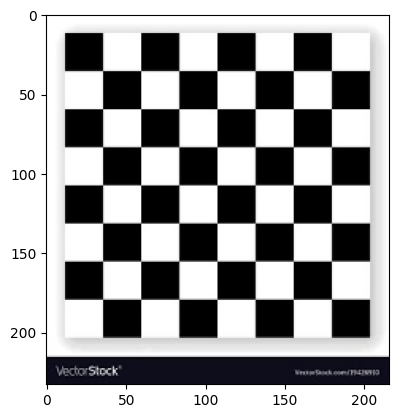

In [7]:
plt.figure()
plt.imshow(image1)

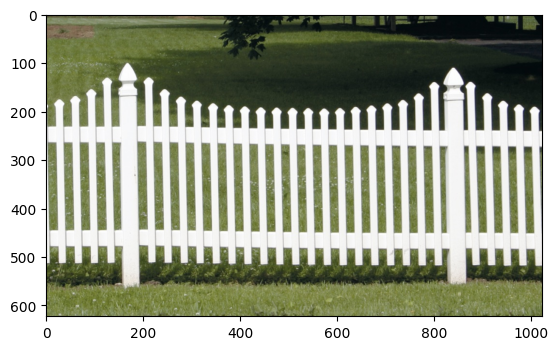

In [8]:
plt.figure()
plt.imshow(image2)

In [9]:
# check that images were converted into numpy arrays correctly
print(type(image1)) # --> output: <class 'numpy.ndarray'>
print(type(image2)) # --> output: <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
# get the value of each pixel of the numpy array image for image1 and image2
# print(image1)
# print(image2)

In [11]:
# definitions of 5 available filters as numpy arrays

filter1 = np.array([[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,1,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]])

filter2 = np.array([[0.5, 0 , -0.5]])

filter3 = np.array([[0.5],[0],[0.5]])

filter4 = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])

filter5 = np.array([[0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
                    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
                    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
                    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
                    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]])

In [12]:
# setting the number of processes
NUMPROCESS = 8

In [13]:
data_buffer_size1 = image1.shape[0] * image1.shape[1] * image1.shape[2]
data_buffer_size2 = image2.shape[0] * image2.shape[1] * image2.shape[2]

In [14]:
print("Size of fist image: ", data_buffer_size1)
print("Size of second image: ", data_buffer_size2)

Size of fist image:  150984
Size of second image:  1913856


In [15]:
# defining multiprocessing vectors (shared spaces)
filtered_image1_VECTOR = mp.Array(ctypes.c_byte, data_buffer_size1)
filtered_image2_VECTOR = mp.Array(ctypes.c_byte, data_buffer_size2)

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 predefined filters, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equal to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [ ]:
#YOUR CODE MUST BE START HERE
# shared_data1 = my.tonumpyarray(filtered_image1_VECTOR)
# shared_data2 = my.tonumpyarray(filtered_image2_VECTOR)
# result_matrix1 = shared_data1.reshape(image1.shape)
# result_matrix2 = shared_data2.reshape(image2.shape)

In [ ]:
# GOES TO MAIN MODULE
# SECOND OBLIGATORY FUNCTION FROM INSTRUCTION
def filters_execution(image: np.array,  
                      filter_mask1: np.array, 
                      filter_mask2: np.array,  
                      numprocessors: int,
                      filtered_image1: mp.Array,
                      filtered_image2: mp.Array ):
    """
    Function invoking 2 different parallel processes, each executing a filter
    on the same image and saving the result to independent memory spaces. Uses
    previous function for filtering.
    """

    # creating two processes
    p1 = mp.Process(target = my.image_filter, args = (image, filter_mask1, numprocessors, filtered_image1))
    p2 = mp.Process(target = my.image_filter, args = (image, filter_mask2, numprocessors, filtered_image2))
    
    # starting processes 
    p1.start() 
    p2.start() 
  
    # wait until processes are finished 
    p1.join() 
    p2.join()

    return

In [ ]:
#YOUR CODE MUST END HERE
filters_execution(image1, filter4, filter5, 4, filtered_image1_VECTOR, filtered_image2_VECTOR)

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [ ]:
filtered_image1 = my.tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2 = my.tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

In [ ]:
plt.figure()
plt.imshow(filtered_image1)

In [ ]:
plt.figure()
plt.imshow(filtered_image2)